In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [76]:
def bootstrap_std_dev(df):
    bootstrapped = df.sample(n=len(df), replace=True) #sample with replacement
    return bootstrapped.std()

def bootstrap_mean(df):
    bootstrapped = df.sample(n=len(df), replace=True) #sample with replacement
    return bootstrapped.mean()

def reject_outliers(data, m = 30.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else np.zeros(len(d))
    # print(s)
    return data[s<m]


c="all"
c='0123'

folder, suffix="parquets/concept_experiments/kmeans", '' 
folder2, suffix2 ="parquets/concept_experiments/kmeans", ''
folder3, suffix3="parquets/concept_experiments/optimised_stochastic", "_params_d100_n150_a001_new_mse_trial_std"



df = pd.read_parquet(f"{folder}/ope_estimates_c{c}_eps02{suffix}")
df_no_outliers = pd.read_parquet(f"{folder}/ope_estimates_c{c}_eps02{suffix}_no_outliers")
df_05 = pd.read_parquet(f"{folder}/ope_estimates_c{c}_eps05{suffix}")
df_no_outliers_05 = pd.read_parquet(f"{folder}/ope_estimates_c{c}_eps05{suffix}_no_outliers")

df_comparison = pd.read_parquet(f"{folder3}/ope_estimates_c{c}_eps02{suffix3}")
df_comparison_no_outliers = pd.read_parquet(f"{folder3}/ope_estimates_c{c}_eps02{suffix3}_no_outliers")

# print(df_05)

# ---REJECT OUTLIERS---
for d in [100, 300, 500, 700, 900]:
    df_05[f"{d}_vanilla"] = reject_outliers(df_05[f"{d}_vanilla"], m=20 )
    df_05[f"{d}_concepts"] = reject_outliers(df_05[f"{d}_concepts"], m=20 )
    df[f"{d}_vanilla"] = reject_outliers(df[f"{d}_vanilla"],m=30 )
    df[f"{d}_concepts"] = reject_outliers(df[f"{d}_concepts"], m=30)
    df_comparison[f"{d}_vanilla"] = reject_outliers(df_comparison[f"{d}_vanilla"], m=10)
    df_comparison[f"{d}_concepts"] = reject_outliers(df_comparison[f"{d}_concepts"], m=10)



#---BOOTSTRAP SAMPLING---
df_bootstrapped_std = pd.concat([bootstrap_std_dev(df) for i in range (1000)], axis=1).T.describe()
df_no_outliers_bootstrapped_std = pd.concat([bootstrap_std_dev(df_no_outliers) for i in range (1000)], axis=1).T.describe()
df_05_bootstrapped_std = pd.concat([bootstrap_std_dev(df_05) for i in range (1000)], axis=1).T.describe()
df_no_outliers_05_bootstrapped_std = pd.concat([bootstrap_std_dev(df_no_outliers_05) for i in range (1000)], axis=1).T.describe()

df_bootstrapped_mean = pd.concat([bootstrap_mean(df) for i in range (1000)], axis=1).T.describe()
df_no_outliers_bootstrapped_mean= pd.concat([bootstrap_mean(df_no_outliers) for i in range (1000)], axis=1).T.describe()
df_05_bootstrapped_mean = pd.concat([bootstrap_mean(df_05) for i in range (1000)], axis=1).T.describe()
df_no_outliers_05_bootstrapped_mean = pd.concat([bootstrap_mean(df_no_outliers_05) for i in range (1000)], axis=1).T.describe()

df_comparison_bootstrapped_std = pd.concat([bootstrap_std_dev(df_comparison) for i in range (1000)], axis=1).T.describe()
df_comparison_no_outliers_bootstrapped_std = pd.concat([bootstrap_std_dev(df_comparison_no_outliers) for i in range (1000)], axis=1).T.describe()
df_comparison_bootstrapped_mean = pd.concat([bootstrap_mean(df_comparison) for i in range (1000)], axis=1).T.describe()
df_comparison_no_outliers_bootstrapped_mean= pd.concat([bootstrap_mean(df_comparison_no_outliers) for i in range (1000)], axis=1).T.describe()


on_policy_05 = -347 # -339 -227 -477 352
on_policy_02 = -423 # -339 -227 -477 414

df_stats = df.describe()
df_no_outliers_stats = df_no_outliers.describe()
df_stats_05 = df_05.describe()
df_no_outliers_stats_05 = df_no_outliers_05.describe()
df_comparison_stats = df_comparison.describe()

print(df_stats_05)
print(df_comparison_stats)
# print(df_bootstrapped_std)
# print(df_bootstrapped_std.loc["std"].filter(like="vanilla"))

x = np.array([100, 300, 500, 700, 900])


       100_vanilla  100_concepts  300_vanilla  300_concepts  500_vanilla  \
count   100.000000     98.000000    99.000000     97.000000    98.000000   
mean   -287.239323   -220.040134  -269.689714   -251.099383  -260.574451   
std     215.821378    132.499228   164.550530    131.092348    99.799141   
min   -1159.731438   -916.865617 -1091.704963   -786.672942  -688.513484   
25%    -315.859099   -245.310253  -289.695495   -256.142931  -305.887541   
50%    -199.863315   -187.744852  -216.649073   -215.004817  -230.754842   
75%    -147.125754   -146.420344  -181.407738   -178.711501  -192.076021   
max     -96.210029    -87.188066  -126.232008   -120.725270  -135.922016   

       500_concepts  700_vanilla  700_concepts  900_vanilla  900_concepts  
count     99.000000   100.000000     98.000000    95.000000     99.000000  
mean    -262.247934  -288.172165   -267.751145  -280.245598   -286.141042  
std      128.043511   171.724978     96.065170   144.090308    127.872061  
min     -94

In [113]:
colors_light = ["mediumturquoise", "orangered","limegreen", "palevioletred", "violet",  "orangered", "plum","lightsteelblue", "greenyellow", "violet"]
colors_dark = ["dodgerblue" , "gold", "forestgreen", "red", "darkviolet", "gold", "blueviolet" , "darkslategrey", "olive", "darkviolet"]

concepts_color = colors_light[2] #"limegreen" mediumturquoise orangered violet palevioletred
concepts_color_05 = colors_dark[2] #"forestgreen" dodgerblue gold darkviolet red
vanilla_color = "lightsalmon"
vanilla_color_05 = "saddlebrown"
comparison_color = colors_dark[6]

kmeans_comparison = False

if kmeans_comparison:
    pdis_label=r'IS kmeans $\epsilon$=0.2'
    cpdis_label=r'CIS kmeans $\epsilon$=0.5'
    pdis_label_2=r'IS Opt $\epsilon$=0.2'
    cpdis_label_2=r'CIS Opt $\epsilon$=0.5'
else:
    pdis_label=r'IS $\epsilon$=0.2'
    cpdis_label=r'CIS $\epsilon$=0.2'
    pdis_label_2=r'IS $\epsilon$=0.5'
    cpdis_label_2=r'CIS $\epsilon$=0.5'

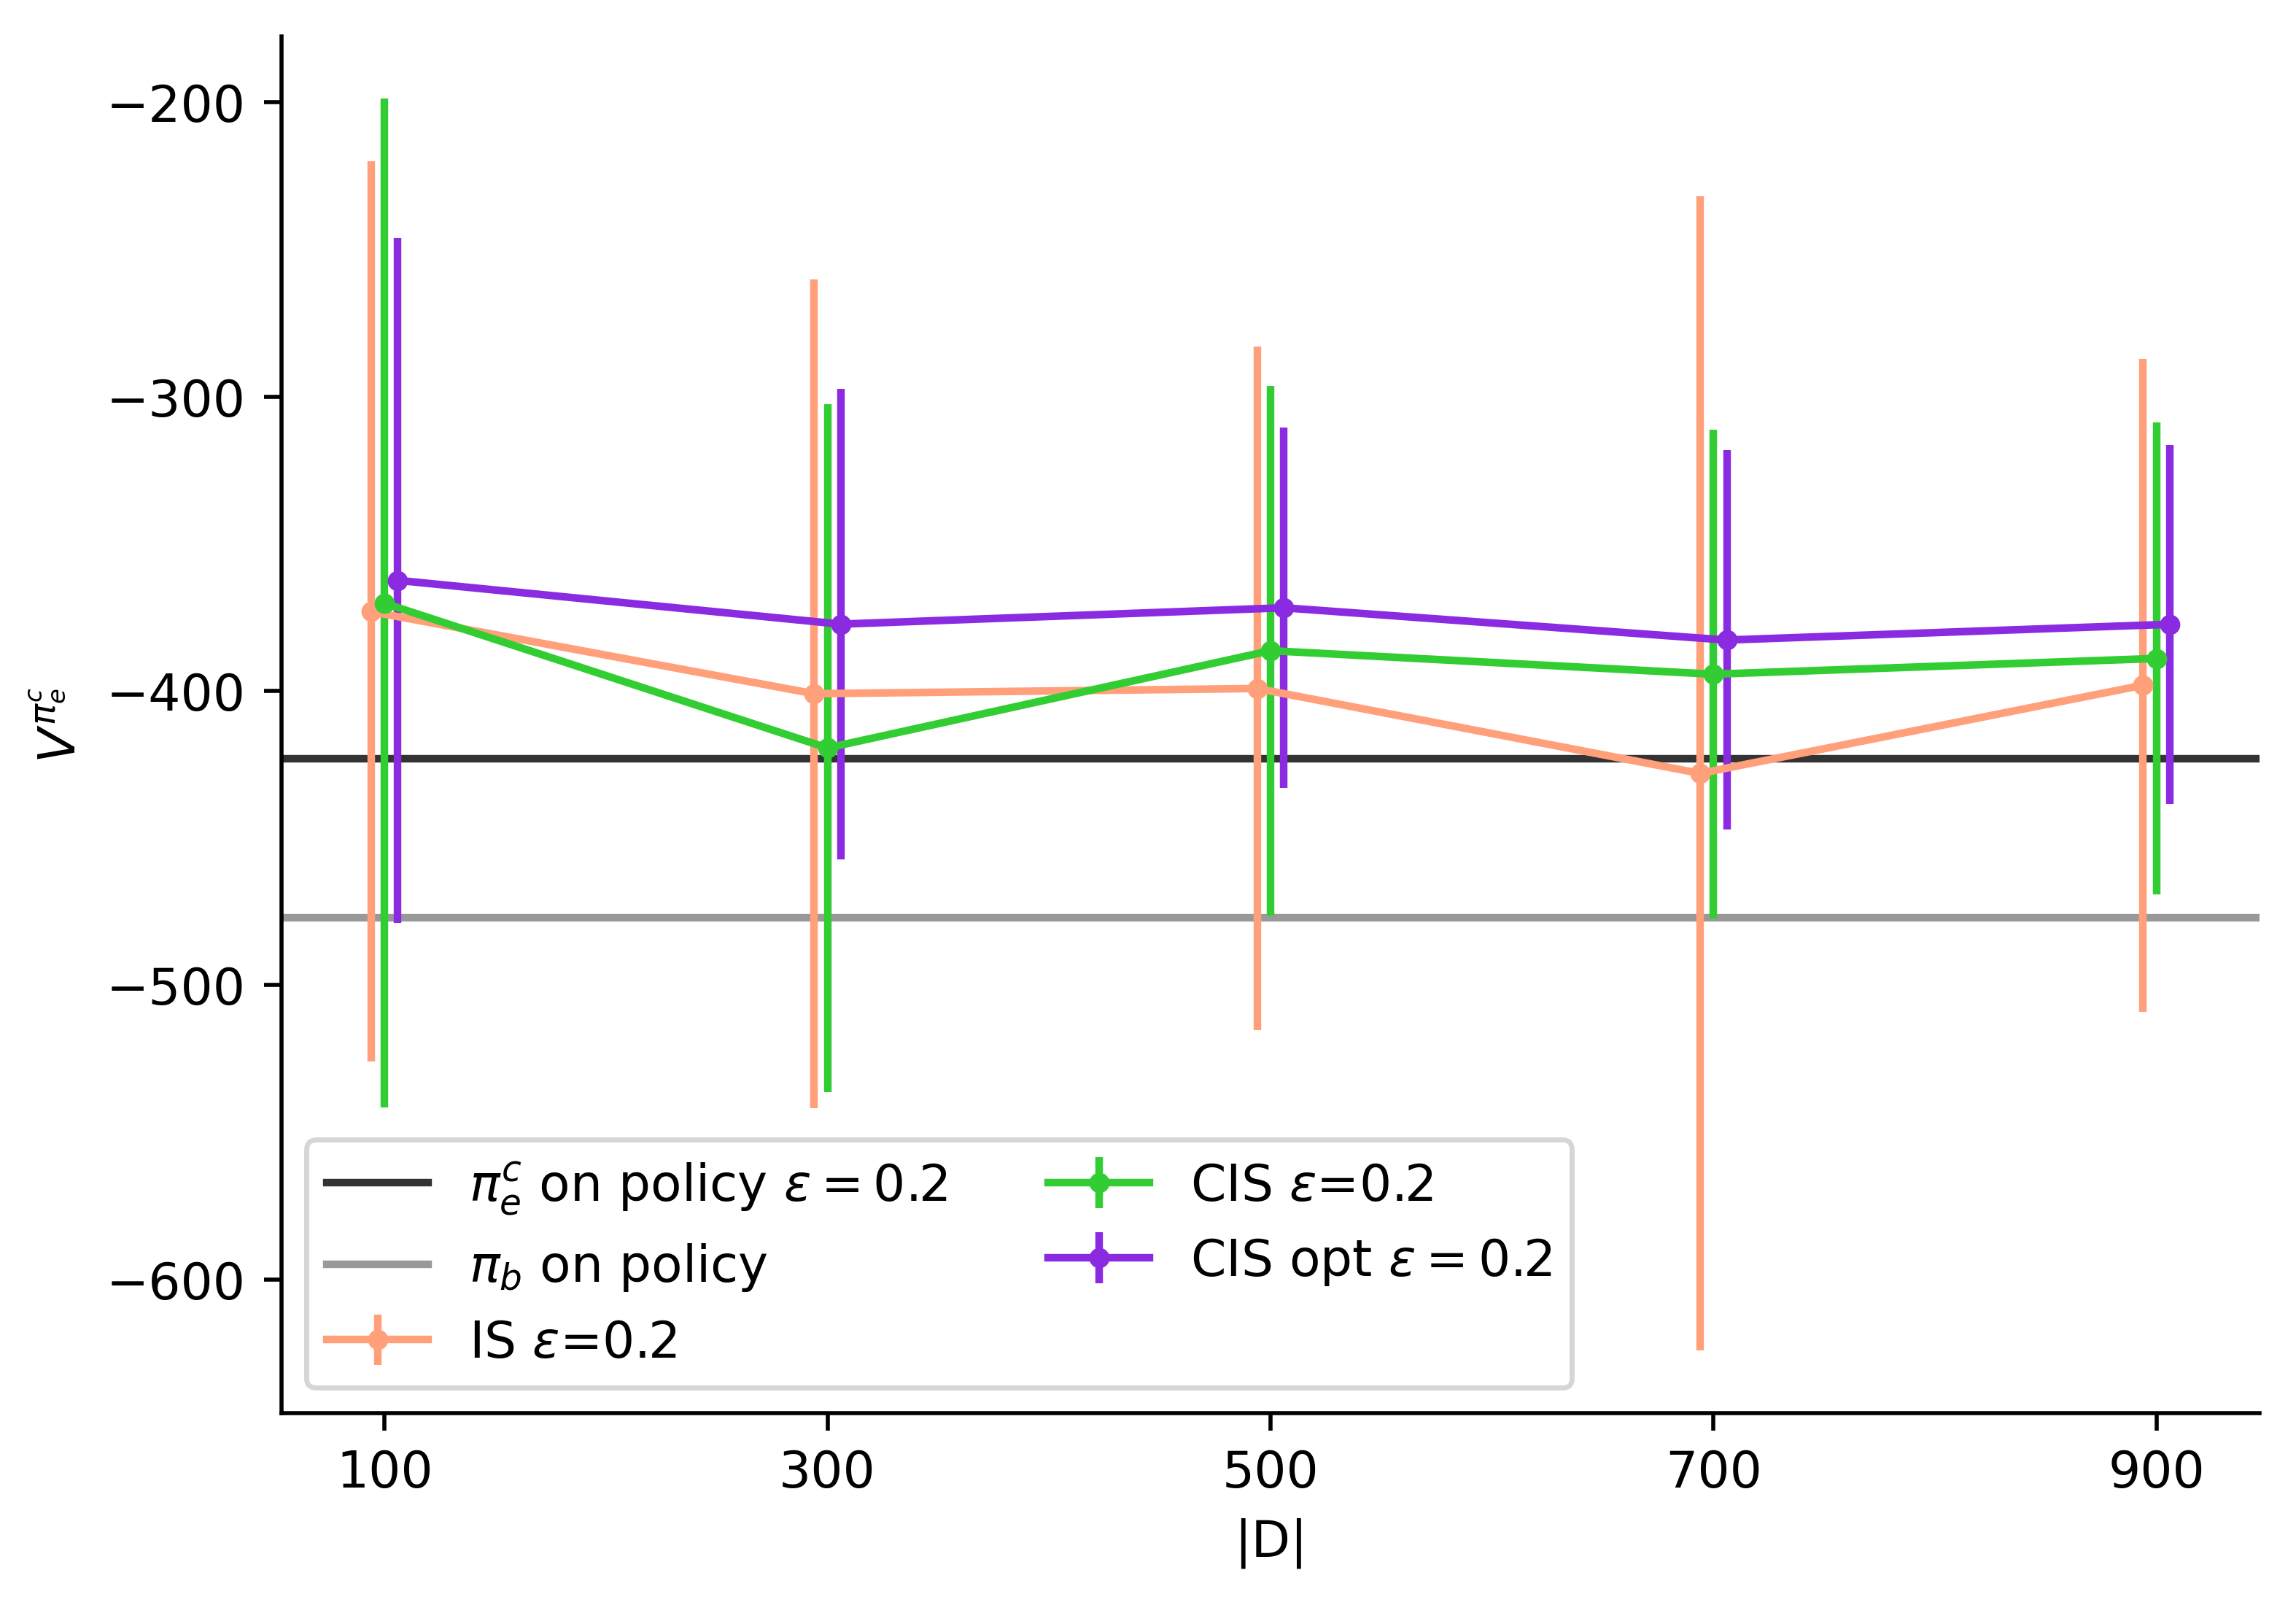

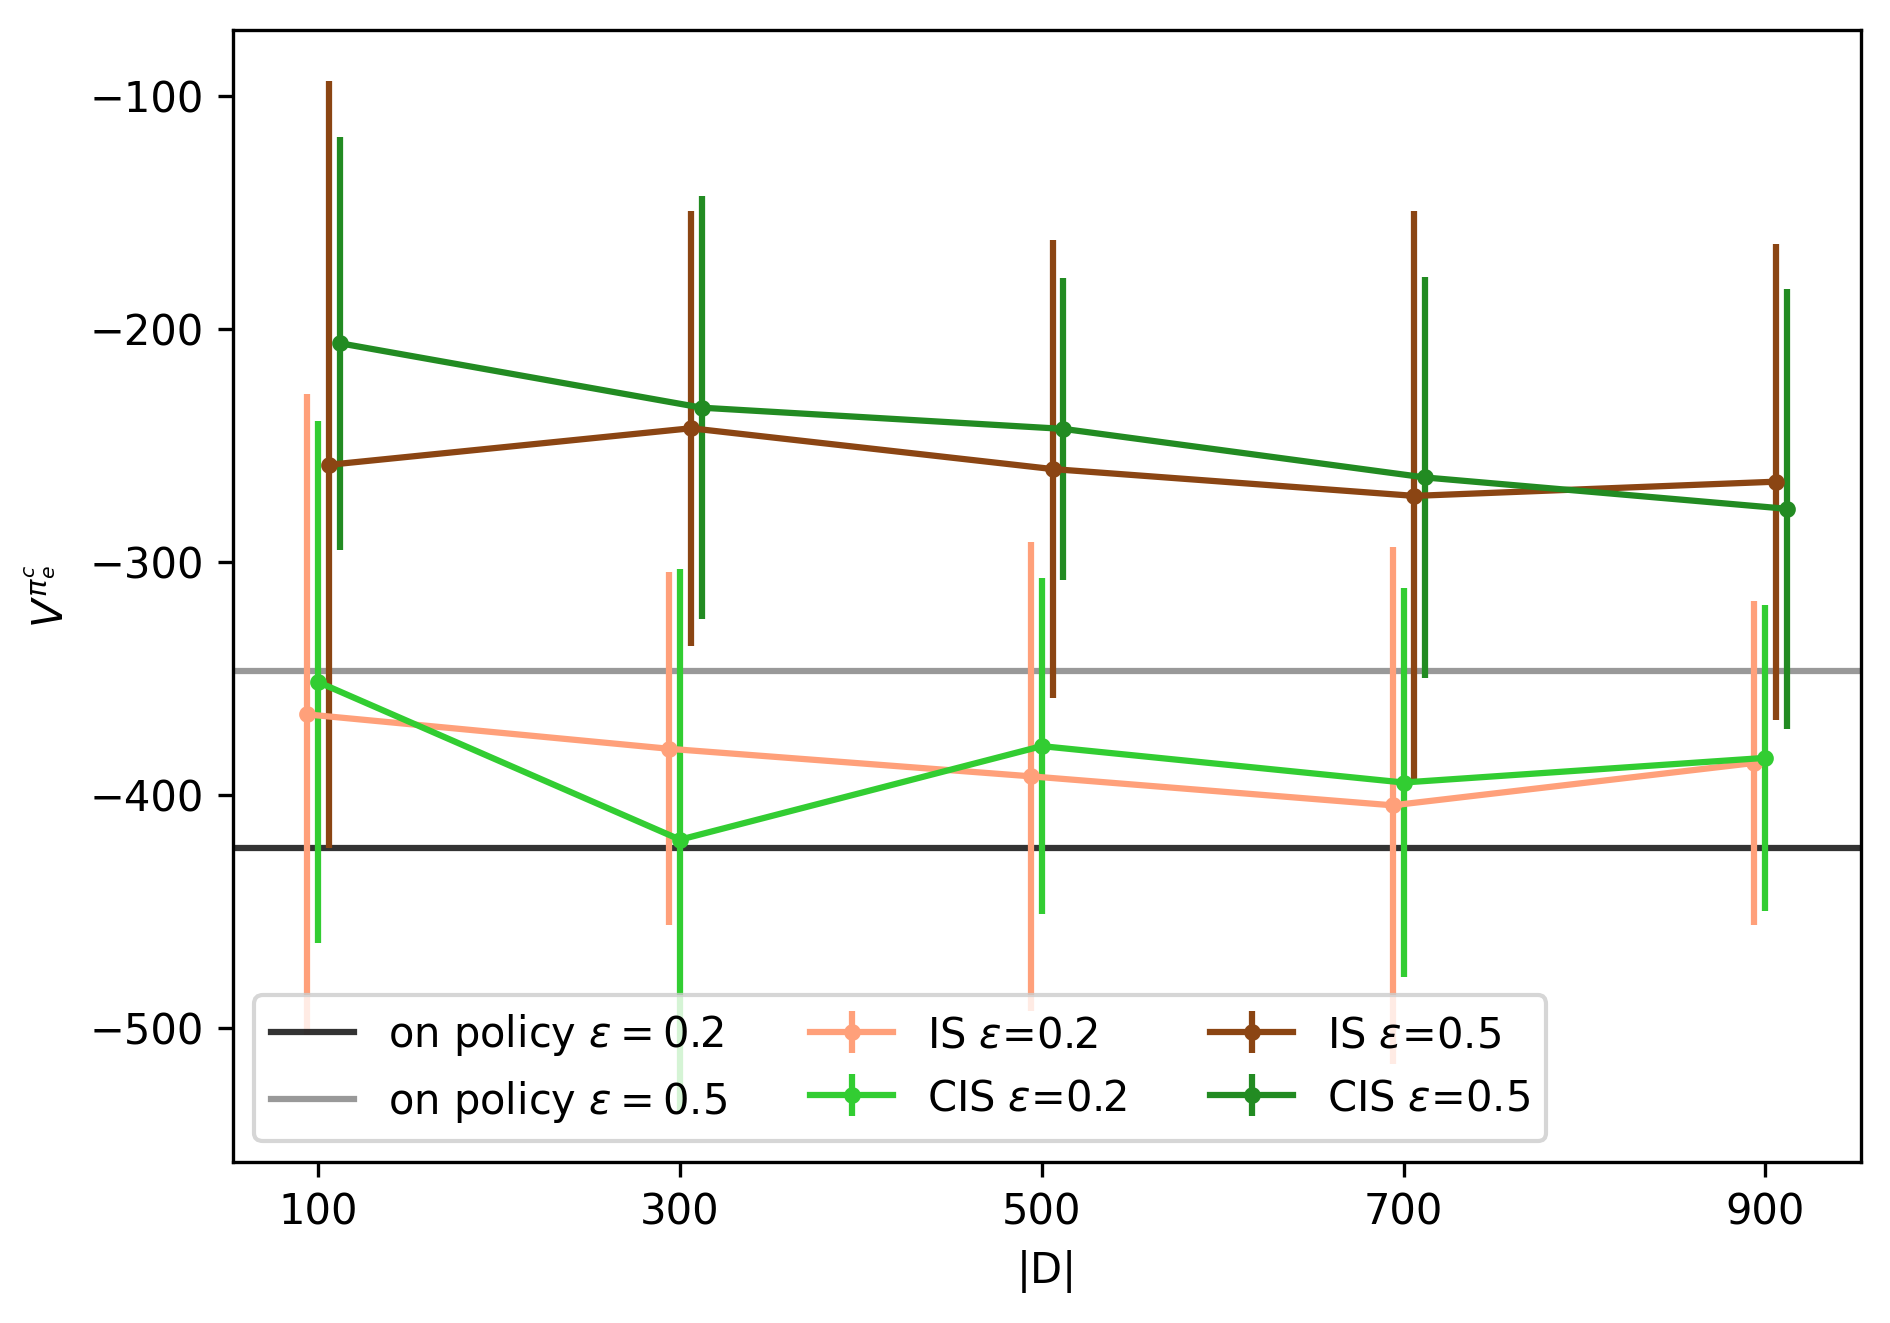

In [137]:
mean_estimates_vanilla = df_bootstrapped_mean.loc["mean"].filter(like="vanilla")
mean_estimates_concepts = df_bootstrapped_mean.loc["mean"].filter(like="concepts")
std_vanilla = df_bootstrapped_std.loc["mean"].filter(like="vanilla")
std_concepts = df_bootstrapped_std.loc["mean"].filter(like="concepts")


mean_estimates_vanilla_05 = df_05_bootstrapped_mean.loc["mean"].filter(like="vanilla")
mean_estimates_concepts_05 = df_05_bootstrapped_mean.loc["mean"].filter(like="concepts")
std_vanilla_05 = df_05_bootstrapped_std.loc["mean"].filter(like="vanilla")
std_concepts_05 = df_05_bootstrapped_std.loc["mean"].filter(like="concepts")

mean_estimates_vanilla_no_outliers = df_no_outliers_bootstrapped_mean.loc["mean"].filter(like="vanilla")
mean_estimates_concepts_no_outliers = df_no_outliers_bootstrapped_mean.loc["mean"].filter(like="concepts")
std_vanilla_no_outliers = df_no_outliers_bootstrapped_std.loc["mean"].filter(like="vanilla")
std_concepts_no_outliers = df_no_outliers_bootstrapped_std.loc["mean"].filter(like="concepts")

mean_estimates_vanilla_no_outliers_05 = df_no_outliers_05_bootstrapped_mean.loc["mean"].filter(like="vanilla")
mean_estimates_concepts_no_outliers_05 = df_no_outliers_05_bootstrapped_mean.loc["mean"].filter(like="concepts")
std_vanilla_no_outliers_05 = df_no_outliers_05_bootstrapped_std.loc["mean"].filter(like="vanilla")
std_concepts_no_outliers_05 = df_no_outliers_05_bootstrapped_std.loc["mean"].filter(like="concepts")


mean_estimates_concepts_comparison = df_comparison_bootstrapped_mean.loc["mean"].filter(like="concepts")
std_concepts_comparison = df_comparison_bootstrapped_std.loc["mean"].filter(like="concepts")

#Windy, express, more concepts
indicative_rewards = [(-251,-406),(-170,-275),(-366,-554)]

a_high_reward, a_low_reward = indicative_rewards[2]


fig = plt.figure(figsize=(7,5), dpi=500)
# plt.subplot(1,2,1)

plt.errorbar(x-6, mean_estimates_vanilla.to_list() , yerr=std_vanilla.to_list(), label=pdis_label, color=vanilla_color, marker=".")
plt.errorbar(x, mean_estimates_concepts.to_list() , yerr=std_concepts.to_list(), label=cpdis_label, color=concepts_color, marker=".")
plt.errorbar(x+6, mean_estimates_concepts_comparison.to_list() , yerr=std_concepts_comparison.to_list(), label=r"CIS opt $\epsilon=0.2$", color=comparison_color, marker=".")
# plt.errorbar(x, mean_estimates_vanilla_05.to_list() , yerr=std_vanilla_05.to_list(), label=pdis_label_2, color=vanilla_color_05, marker=".")
# plt.errorbar(x+12, mean_estimates_concepts_05.to_list() , yerr=std_concepts_05.to_list(), label=cpdis_label_2, color=concepts_color_05, marker=".")
plt.axhline(on_policy_02, label=r"$\pi_e^c$ on policy $\epsilon=0.2$", color="black", alpha=0.8, zorder=-1)
plt.axhline(-477, label=r"$\pi_b$ on policy", color="grey", alpha=0.8, zorder=-1)
plt.legend(loc="lower left", ncols=2)# bbox_to_anchor=(1.1, 1.1)
plt.ylabel(r"$V^{\pi_e^c}$")
plt.xlabel("|D|")
plt.xticks(x)
for pos in ['right', 'top']:
    plt.gca().spines[pos].set_visible(False)

fig = plt.figure(figsize=(7,5), dpi=300)
# plt.subplot(1,2,2)
plt.errorbar(x-6, mean_estimates_vanilla_no_outliers.to_list() , yerr=std_vanilla_no_outliers.to_list(), label=pdis_label, color=vanilla_color, marker=".")
plt.errorbar(x, mean_estimates_concepts_no_outliers.to_list() , yerr=std_concepts_no_outliers.to_list(), label=cpdis_label, color=concepts_color, marker=".")
plt.errorbar(x+6, mean_estimates_vanilla_no_outliers_05.to_list() , yerr=std_vanilla_no_outliers_05.to_list(), label=pdis_label_2, color=vanilla_color_05, marker=".")
plt.errorbar(x+12, mean_estimates_concepts_no_outliers_05.to_list() , yerr=std_concepts_no_outliers_05.to_list(), label=cpdis_label_2, color=concepts_color_05, marker=".")
plt.axhline(on_policy_02, label=r"on policy $\epsilon=0.2$", color="black", alpha=0.8, zorder=-1)
plt.axhline(on_policy_05, label=r"on policy $\epsilon=0.5$", color="grey", alpha=0.8, zorder=-1)
plt.xlabel("|D|")
plt.xticks(x)


plt.ylabel(r"$V^{\pi_e^c}$")
plt.legend(loc="lower left", ncols=3)

plt.show()

## Bias Plots

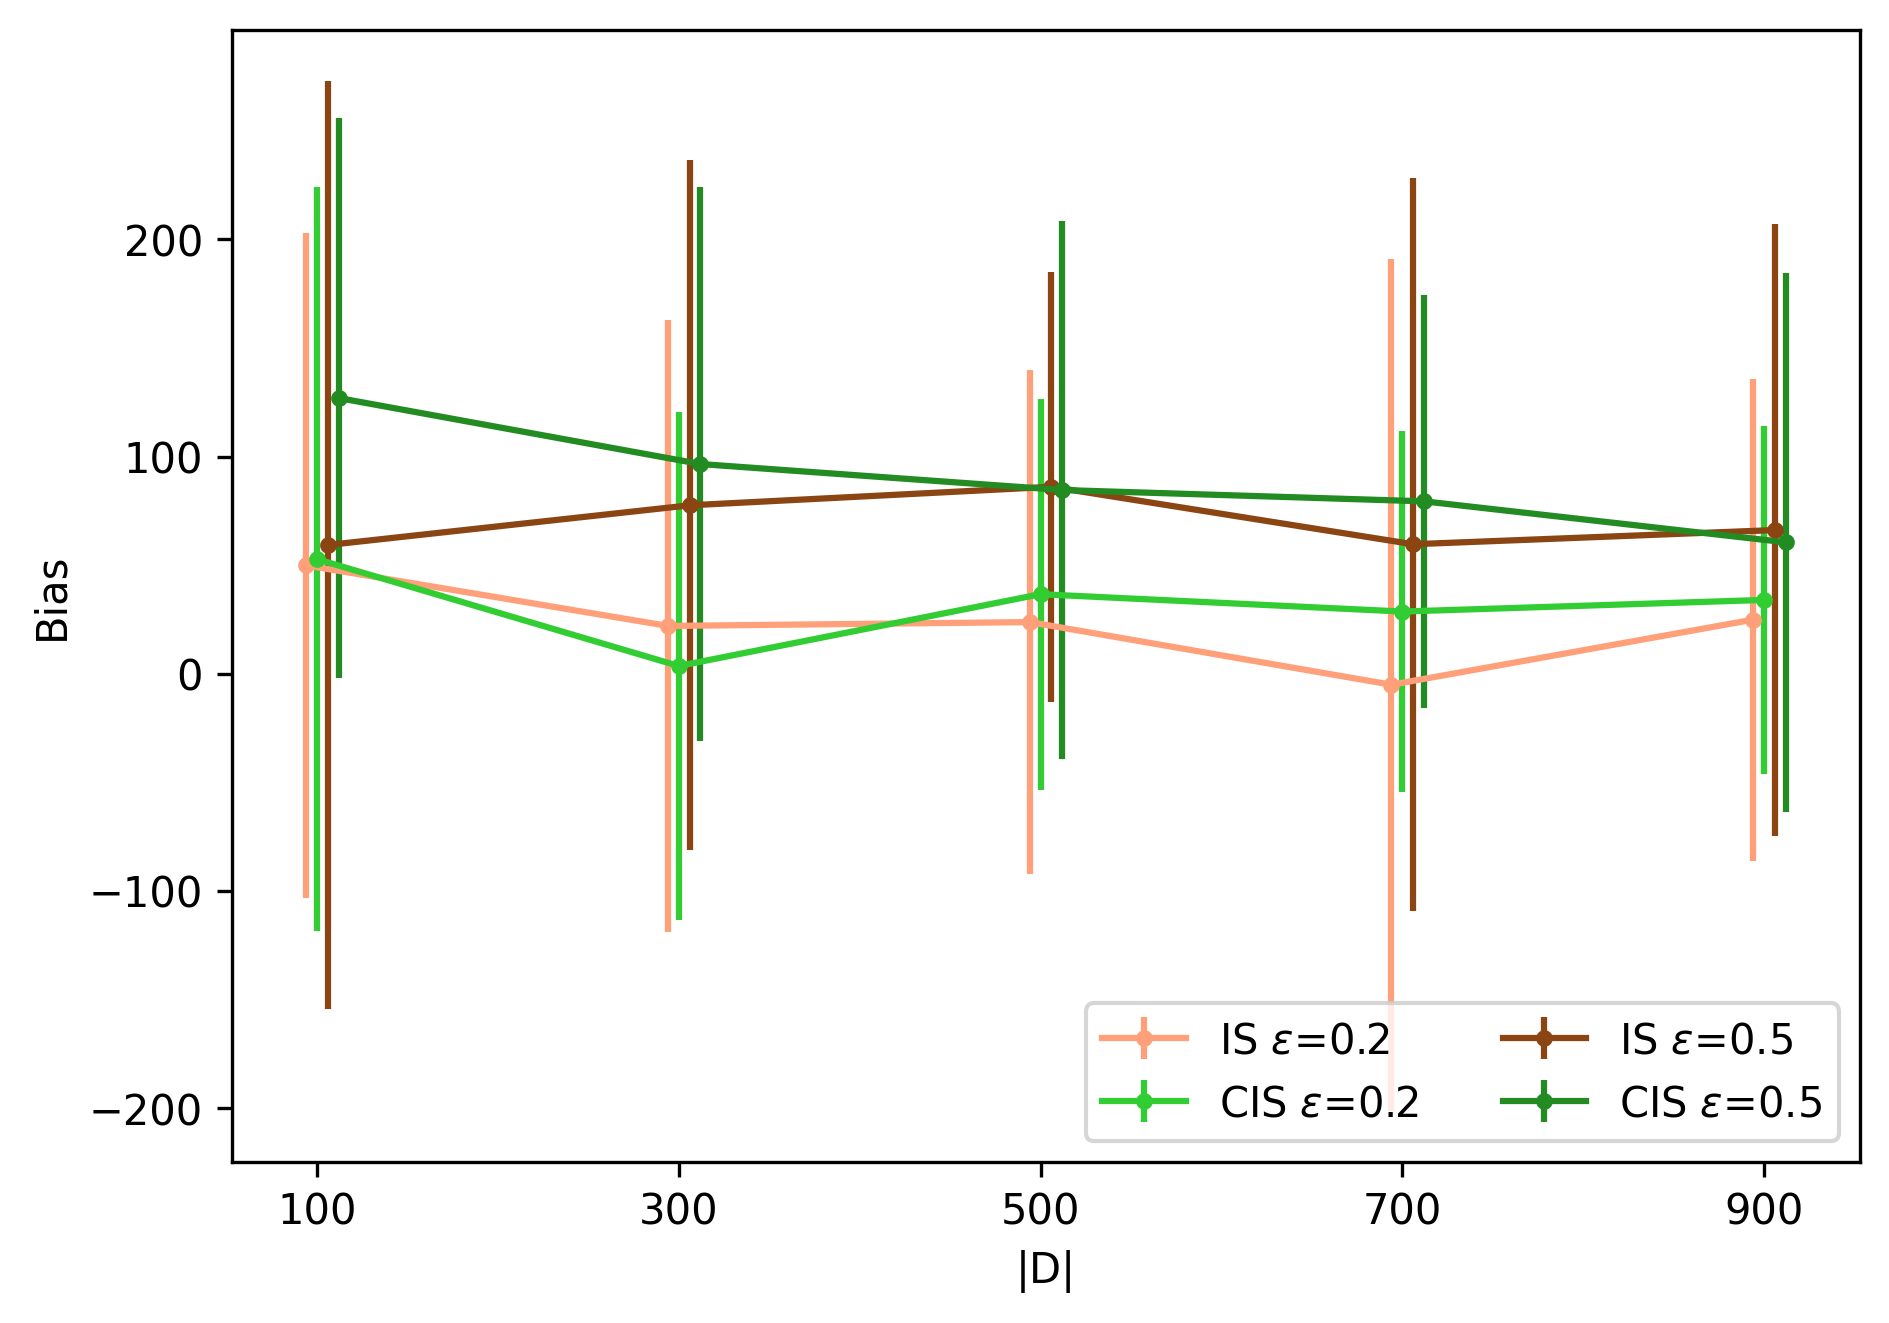

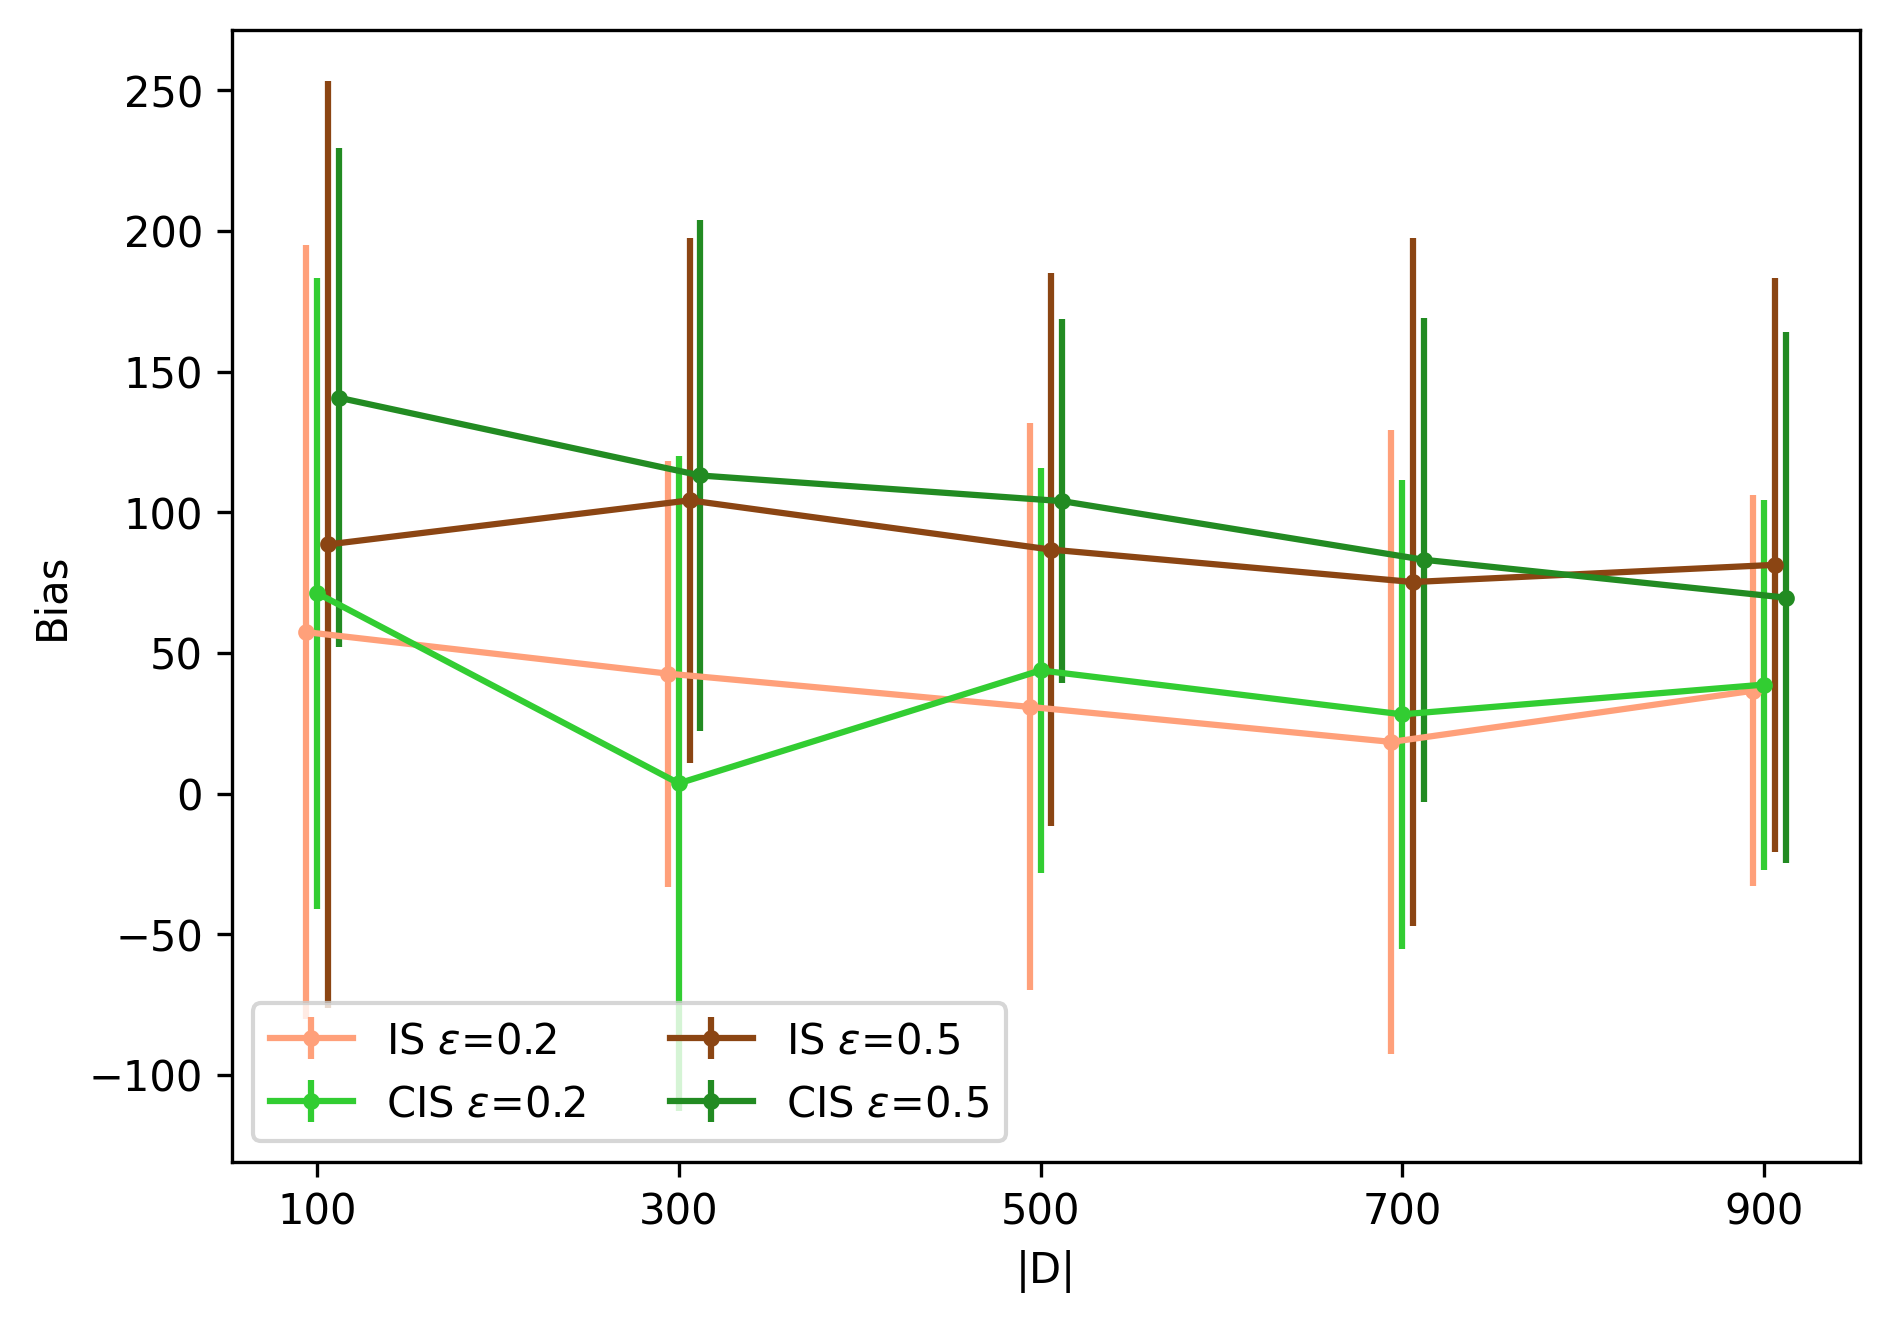

In [115]:

bias_vanilla = mean_estimates_vanilla - on_policy_02
bias_concepts = mean_estimates_concepts - on_policy_02
bias_vanilla_no_outliers = mean_estimates_vanilla_no_outliers - on_policy_02
bias_concepts_no_outliers = mean_estimates_concepts_no_outliers - on_policy_02

bias_vanilla_05 = mean_estimates_vanilla_05 - on_policy_05
bias_concepts_05 = mean_estimates_concepts_05 - on_policy_05
bias_vanilla_no_outliers_05 = mean_estimates_vanilla_no_outliers_05 - on_policy_05
bias_concepts_no_outliers_05 = mean_estimates_concepts_no_outliers_05 - on_policy_05

bias_comparison = mean_estimates_concepts_comparison - on_policy_02



fig = plt.figure(figsize=(7,5), dpi=300)
# plt.subplot(1,2,1)
plt.errorbar(x-6, bias_vanilla, label=pdis_label, yerr=std_vanilla.to_list(), color=vanilla_color, marker=".")
plt.errorbar(x, bias_concepts, label=cpdis_label, yerr=std_concepts.to_list(), color=concepts_color, marker=".")
plt.errorbar(x+6, bias_vanilla_05, label=pdis_label_2, yerr=std_vanilla_05.to_list(), color=vanilla_color_05, marker=".")
plt.errorbar(x+12, bias_concepts_05, label=cpdis_label_2, yerr=std_concepts_05.to_list(), color=concepts_color_05, marker=".")
plt.xlabel("|D|")
plt.ylabel("Bias") 
plt.xticks(x)
plt.legend(loc="lower right",ncols=2)

fig = plt.figure(figsize=(7,5), dpi=300)
# plt.subplot(1,2,2)
plt.errorbar(x-6, bias_vanilla_no_outliers, yerr=std_vanilla_no_outliers.to_list(), label=pdis_label, color=vanilla_color, marker=".")
plt.errorbar(x, bias_concepts_no_outliers, yerr=std_concepts_no_outliers.to_list(), label=cpdis_label, color=concepts_color, marker=".")
plt.errorbar(x+6, bias_vanilla_no_outliers_05, yerr=std_vanilla_no_outliers_05.to_list(), label=pdis_label_2, color=vanilla_color_05, marker=".")
plt.errorbar(x+12, bias_concepts_no_outliers_05, yerr=std_concepts_no_outliers_05.to_list(), label=cpdis_label_2, color=concepts_color_05, marker=".")
plt.ylabel("Bias")
plt.xlabel("|D|")
plt.xticks(x)

plt.legend(loc="lower left", ncols=2)
plt.show()


## Variance Plots

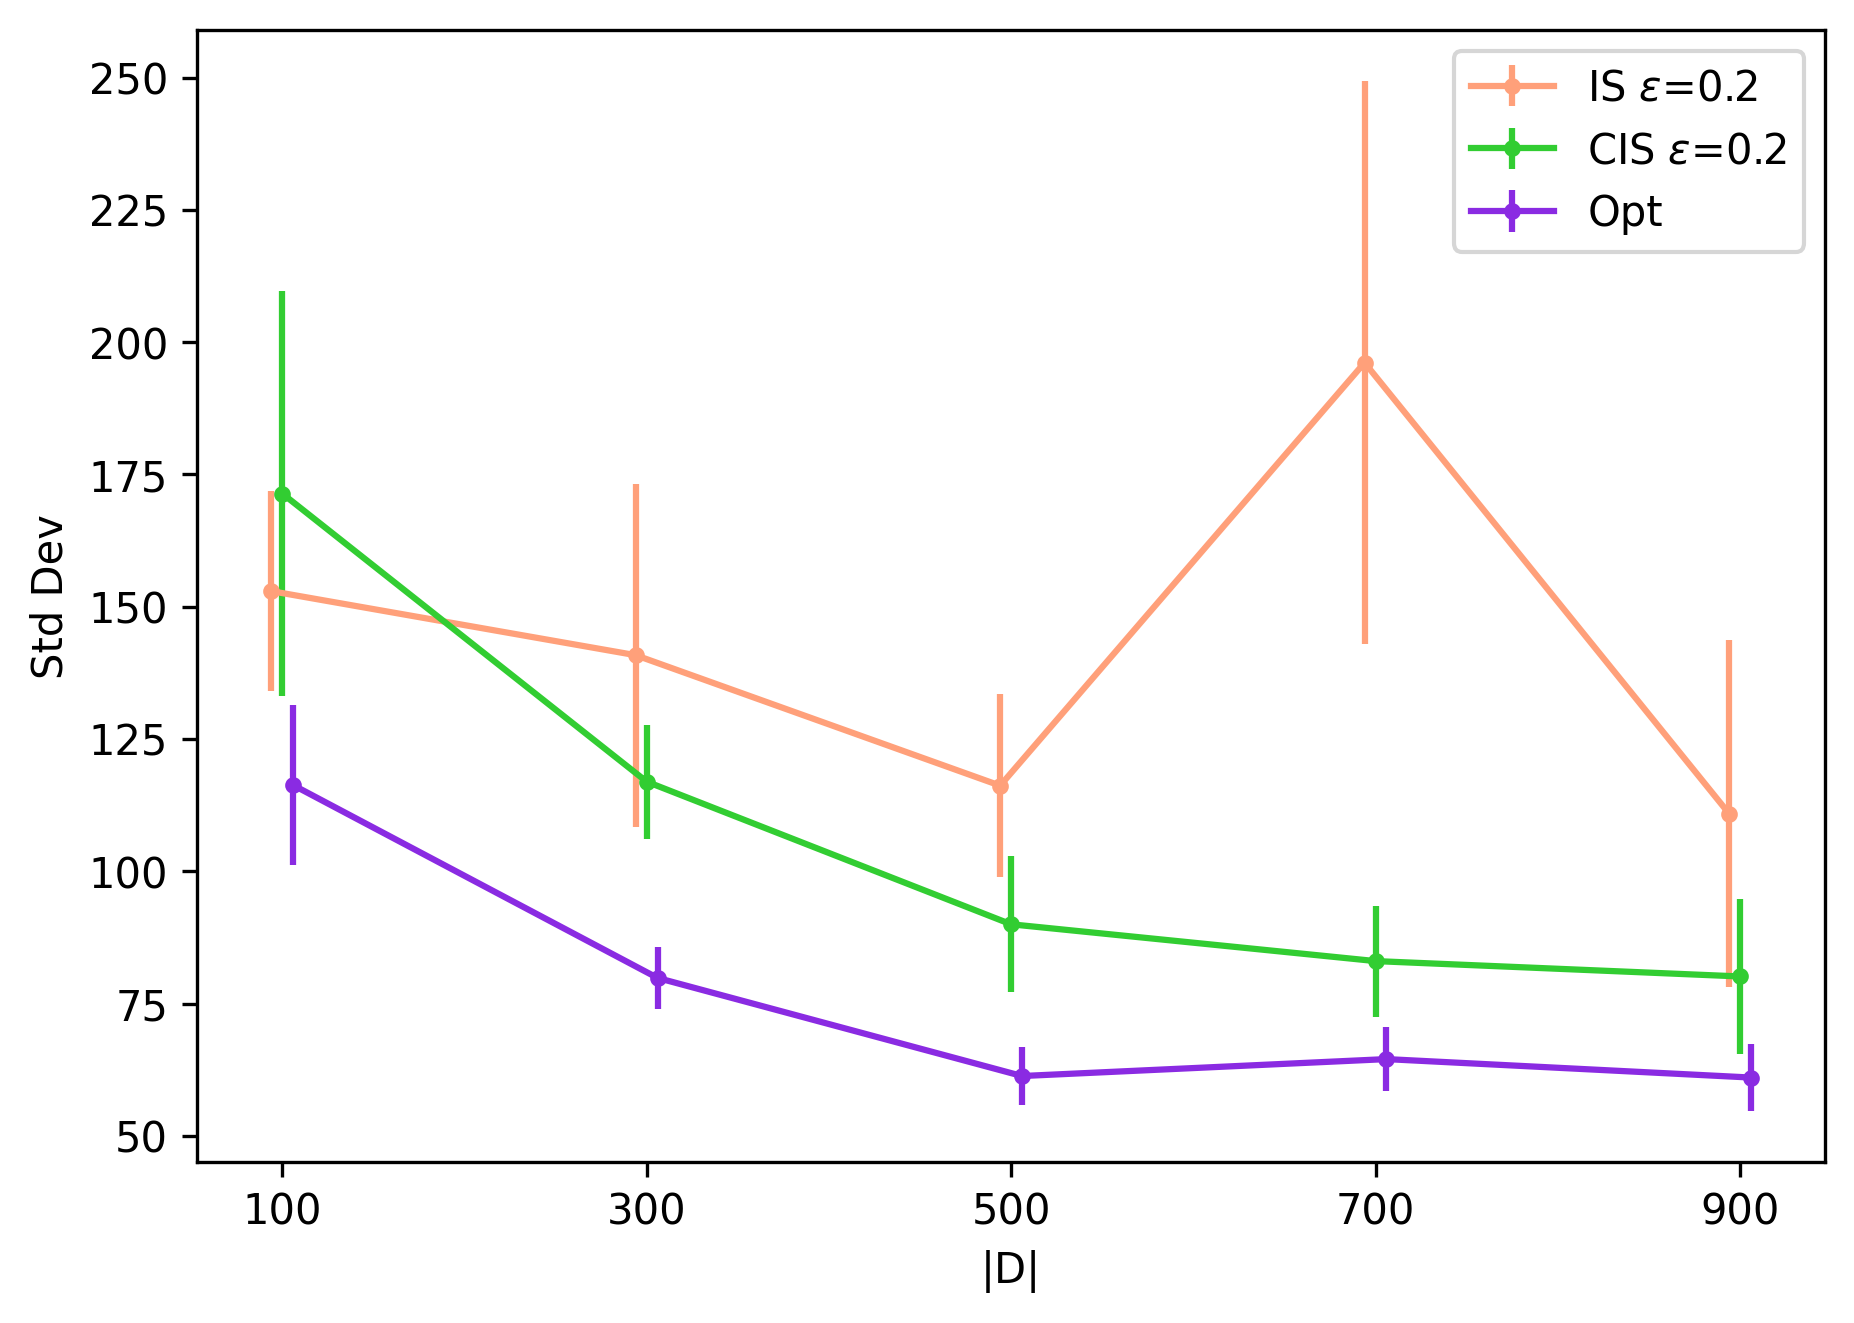

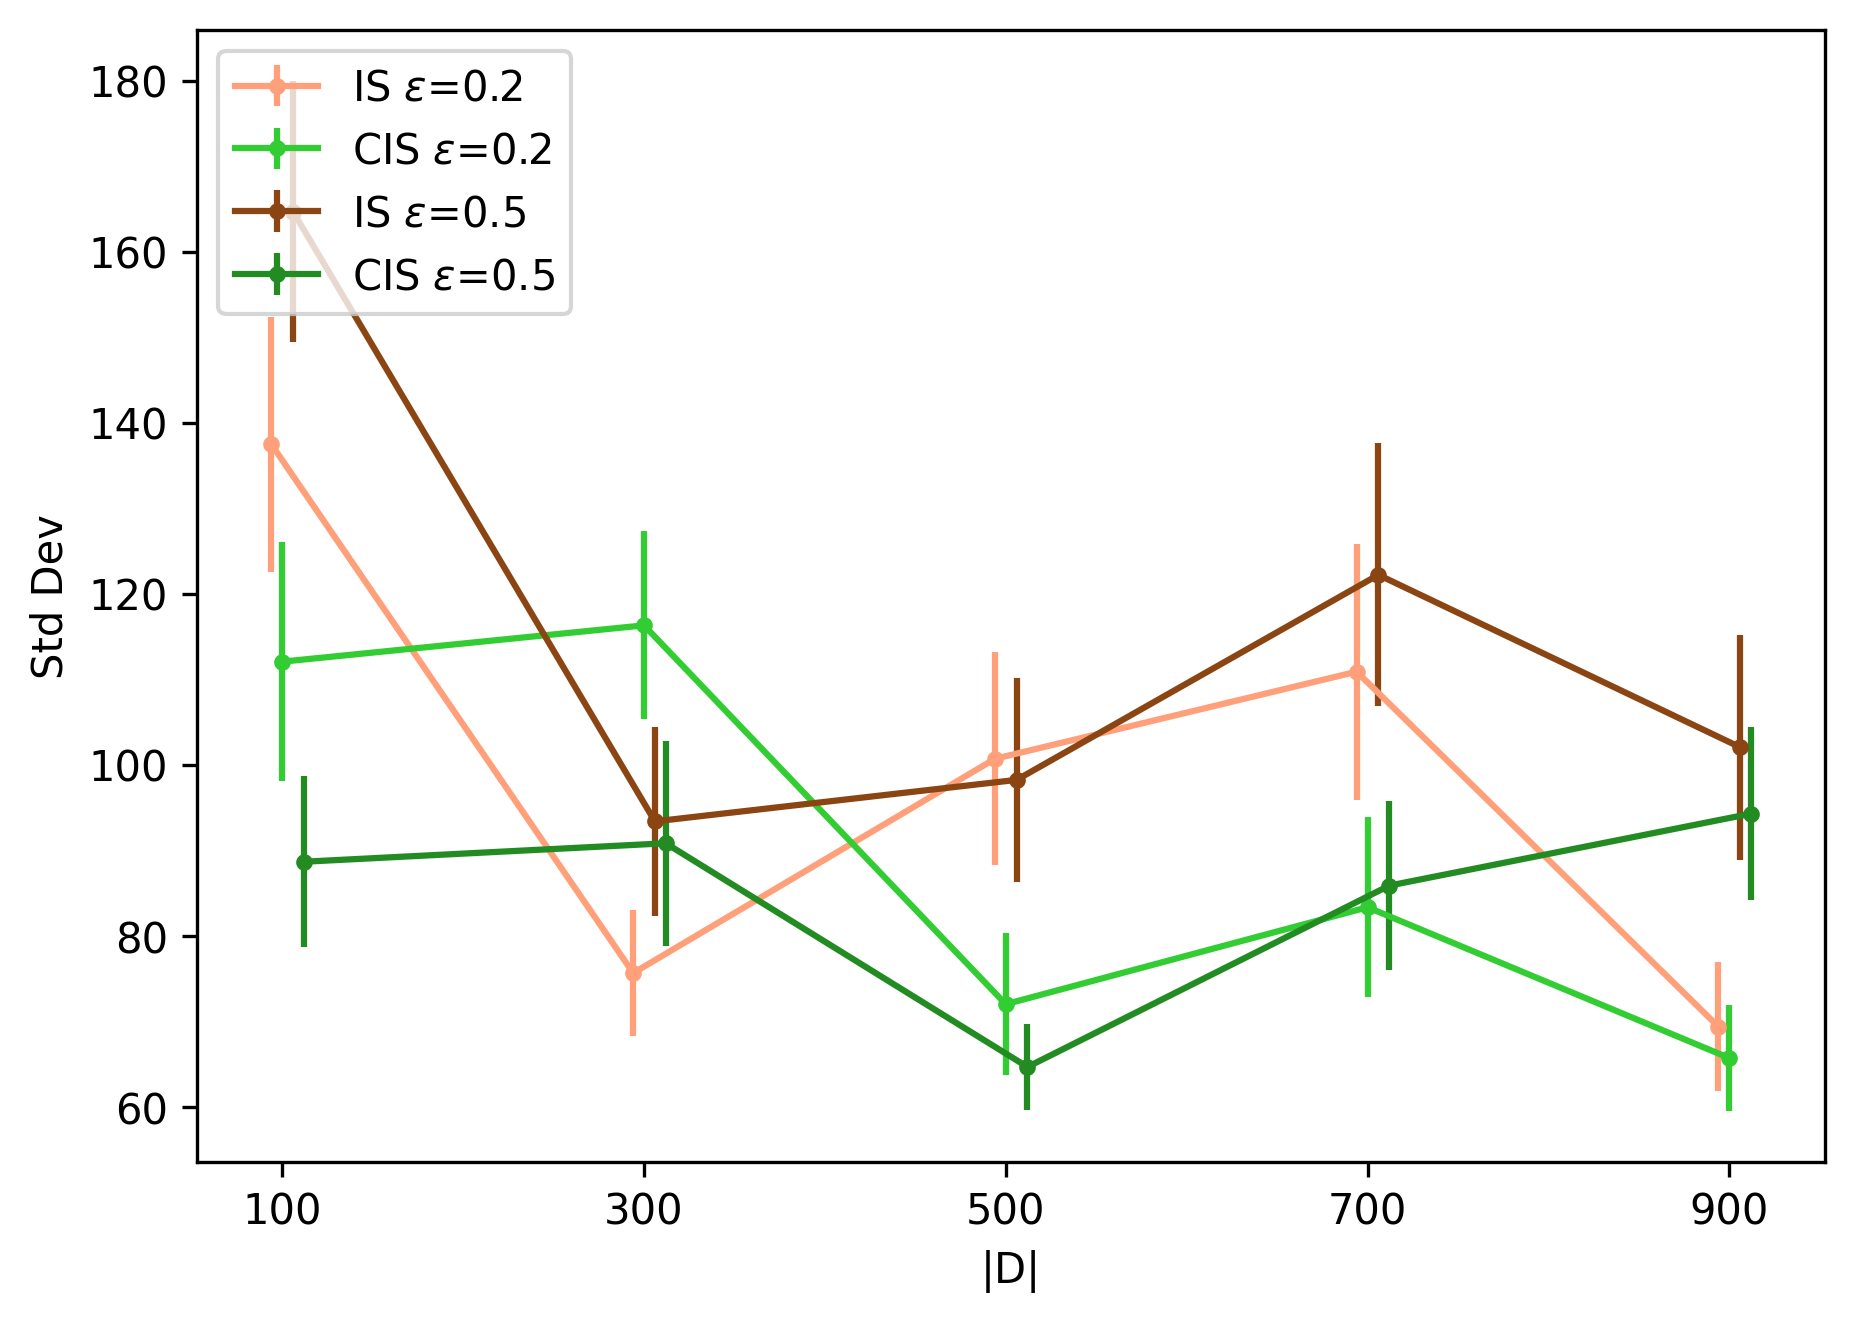

In [116]:
var_vanilla = std_vanilla**2
var_concepts = std_concepts**2
var_vanilla_no_outliers = std_vanilla_no_outliers**2
var_concepts_no_outliers = std_concepts_no_outliers**2
var_vanilla_05 = std_vanilla_05**2
var_concepts_05 = std_concepts_05**2
var_vanilla_no_outliers_05 = std_vanilla_no_outliers_05**2
var_concepts_no_outliers_05 = std_concepts_no_outliers_05**2

var_comparison = std_concepts_comparison**2

#Error bars of standard deviation from bootstrap sampling
err_vanilla = df_bootstrapped_std.loc["std"].filter(like="vanilla")
err_concepts = df_bootstrapped_std.loc["std"].filter(like="concepts")
err_vanilla_no_outliers = df_no_outliers_bootstrapped_std.loc["std"].filter(like="vanilla")
err_concepts_no_outliers = df_no_outliers_bootstrapped_std.loc["std"].filter(like="concepts")
err_vanilla_05 = df_05_bootstrapped_std.loc["std"].filter(like="vanilla")
err_concepts_05 = df_05_bootstrapped_std.loc["std"].filter(like="concepts")
err_vanilla_no_outliers_05 = df_no_outliers_05_bootstrapped_std.loc["std"].filter(like="vanilla")
err_concepts_no_outliers_05 = df_no_outliers_05_bootstrapped_std.loc["std"].filter(like="concepts")

err_comparison = df_comparison_bootstrapped_std.loc["std"].filter(like="concepts")


fig = plt.figure(figsize=(7,5), dpi=300)
# plt.subplot(1,2,1)

plt.errorbar(x-6, std_vanilla, yerr=err_vanilla.to_list(), label=pdis_label, color=vanilla_color, marker=".")
plt.errorbar(x, std_concepts, yerr=err_concepts.to_list(), label=cpdis_label, color=concepts_color, marker=".")
plt.errorbar(x+6, std_concepts_comparison, yerr=err_comparison.to_list(), label="Opt", color=comparison_color, marker=".")
# plt.errorbar(x+6, std_vanilla_05, yerr=err_vanilla_05.to_list(), label=pdis_label_2, color=vanilla_color_05,  marker=".")
# plt.errorbar(x+12, std_concepts_05, yerr=err_concepts_05.to_list(), label=cpdis_label_2, color=concepts_color_05,  marker=".")
plt.xlabel("|D|")
plt.ylabel("Std Dev")
plt.legend(loc="upper right",)
plt.xticks(x)

fig = plt.figure(figsize=(7,5), dpi=300)
# plt.subplot(1,2,2)
plt.errorbar(x-6, std_vanilla_no_outliers, yerr=err_vanilla_no_outliers.to_list(), label=pdis_label, color=vanilla_color, marker=".")
plt.errorbar(x, std_concepts_no_outliers, yerr=err_concepts_no_outliers.to_list(), label=cpdis_label, color=concepts_color, marker=".")
plt.errorbar(x+6, std_vanilla_no_outliers_05, yerr=err_vanilla_no_outliers_05.to_list(), label=pdis_label_2, color=vanilla_color_05,  marker=".")
plt.errorbar(x+12, std_concepts_no_outliers_05, yerr=err_concepts_no_outliers_05.to_list(), label=cpdis_label_2, color=concepts_color_05,  marker=".")
plt.xlabel("|D|")
plt.ylabel("Std Dev")
plt.xticks(x)


plt.legend(loc="upper left", ncols=1)
plt.show()


## MSE Plots

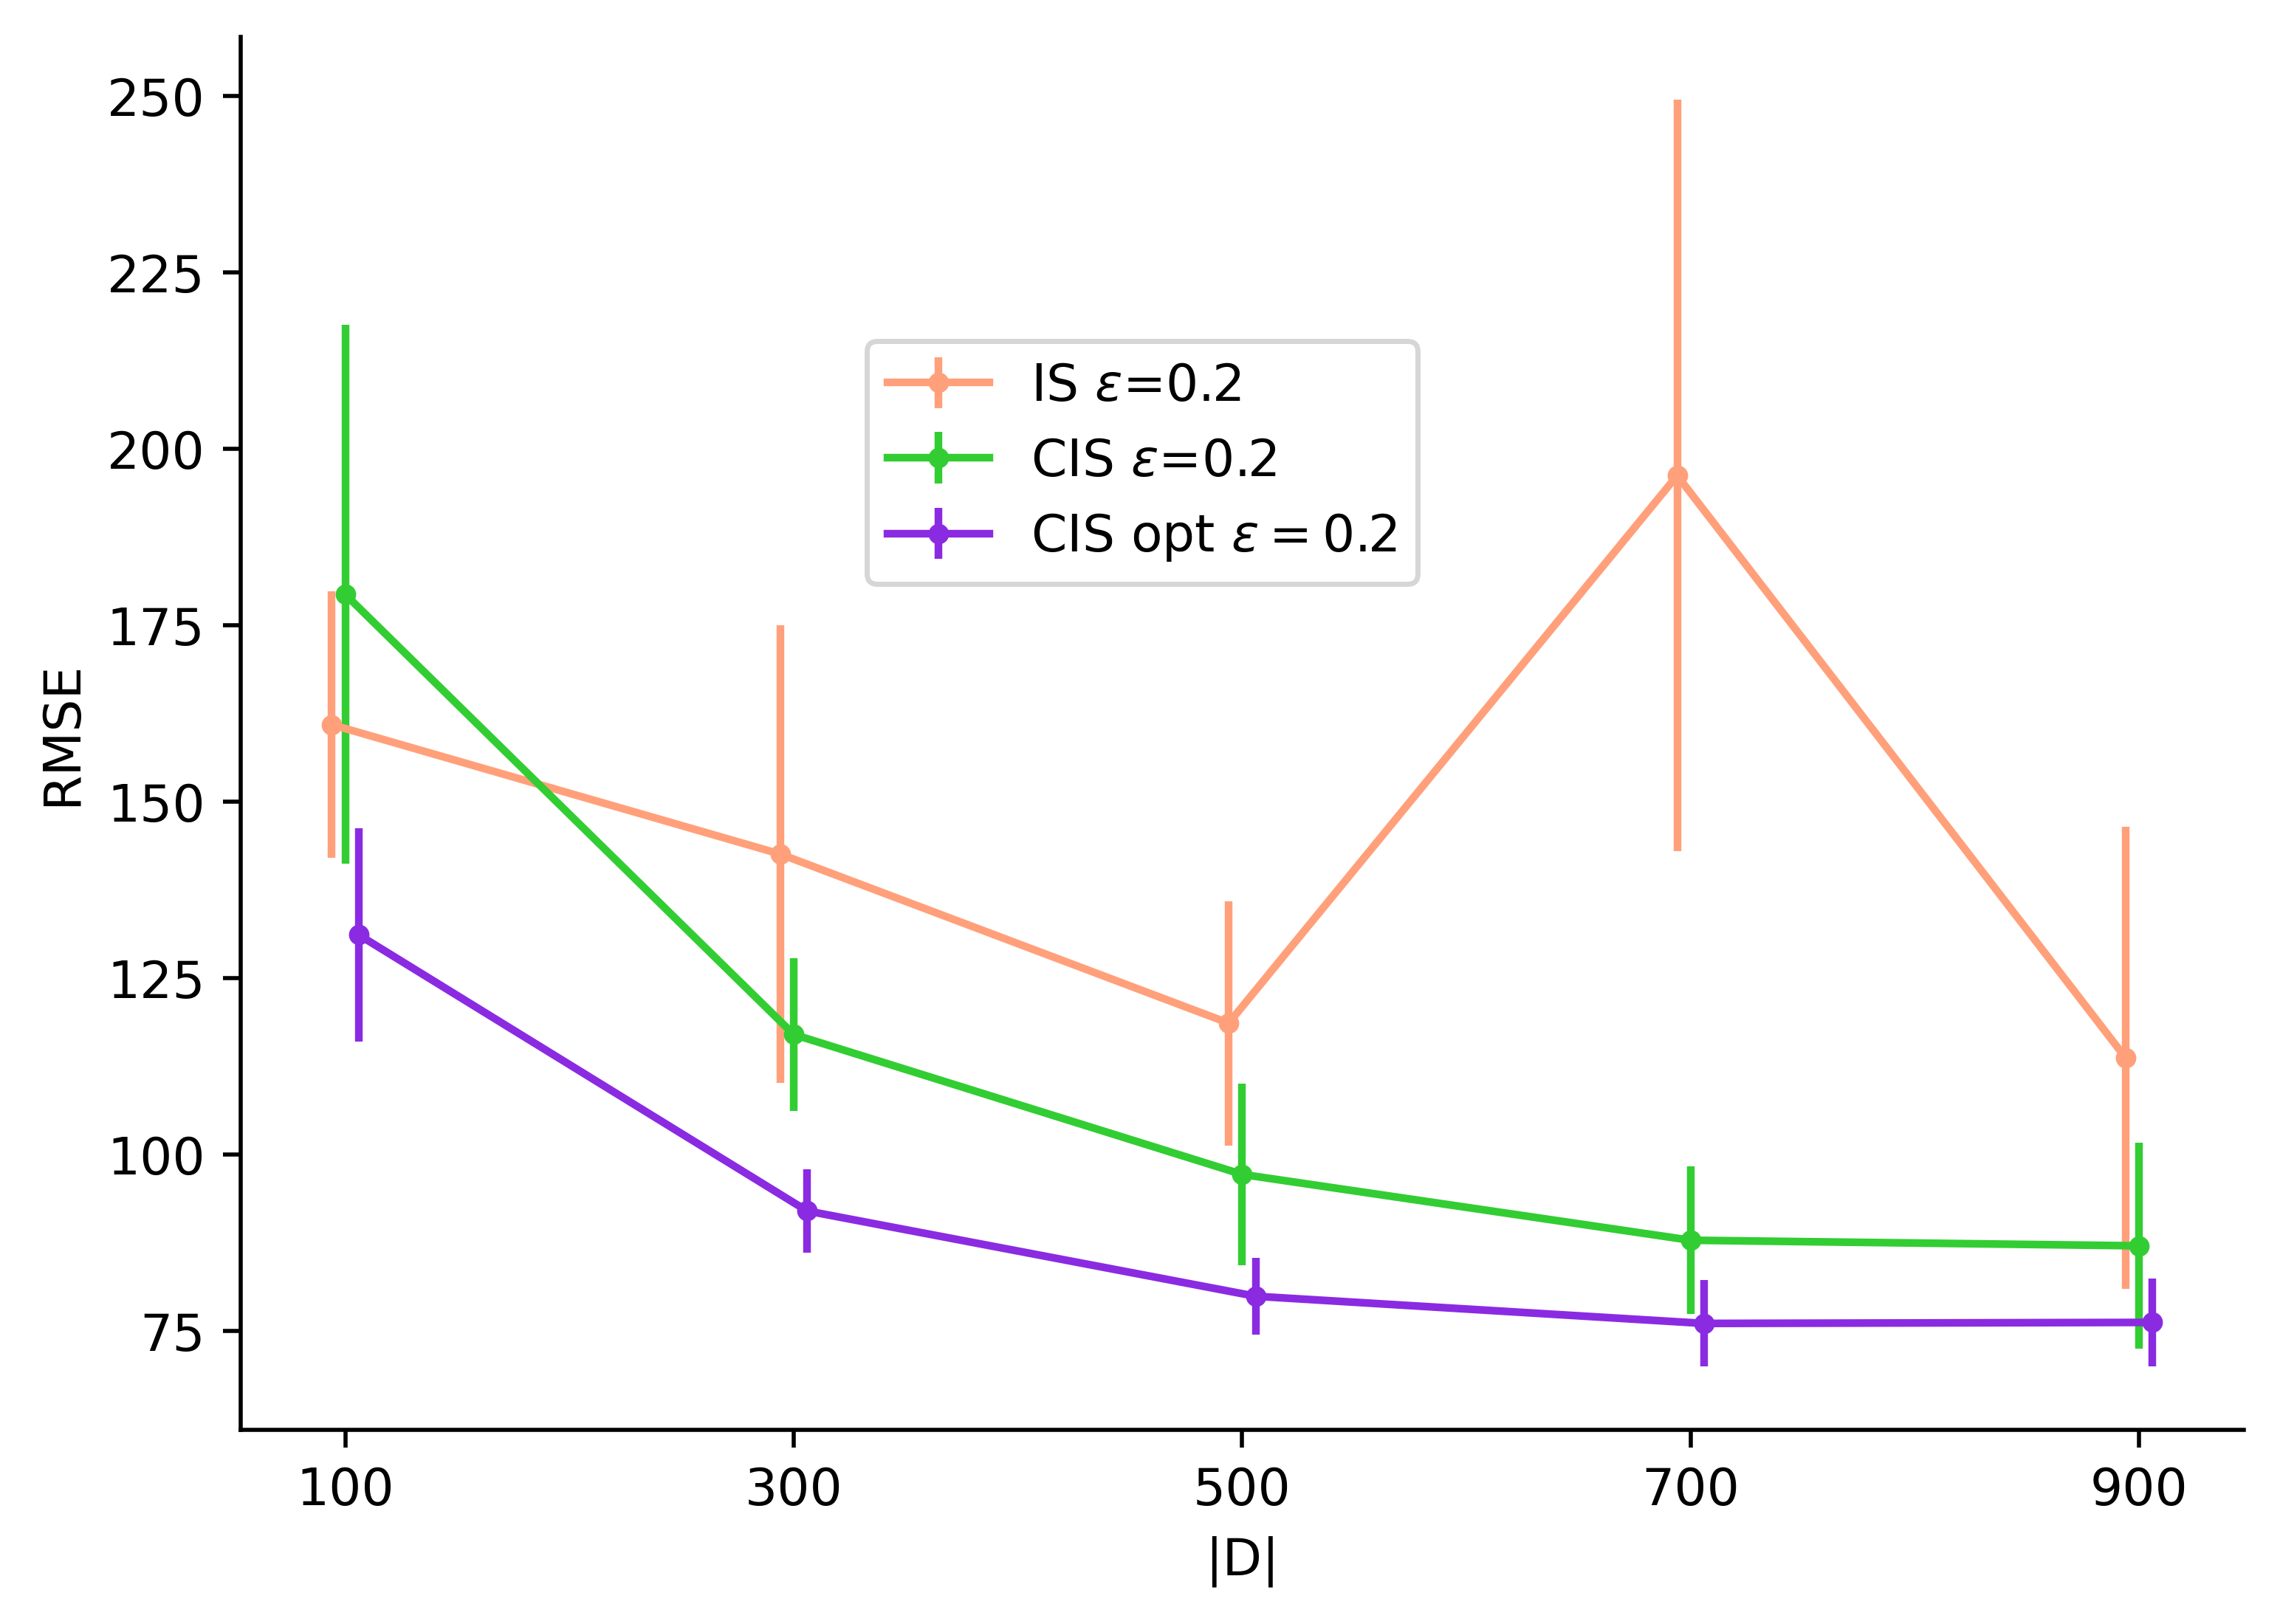

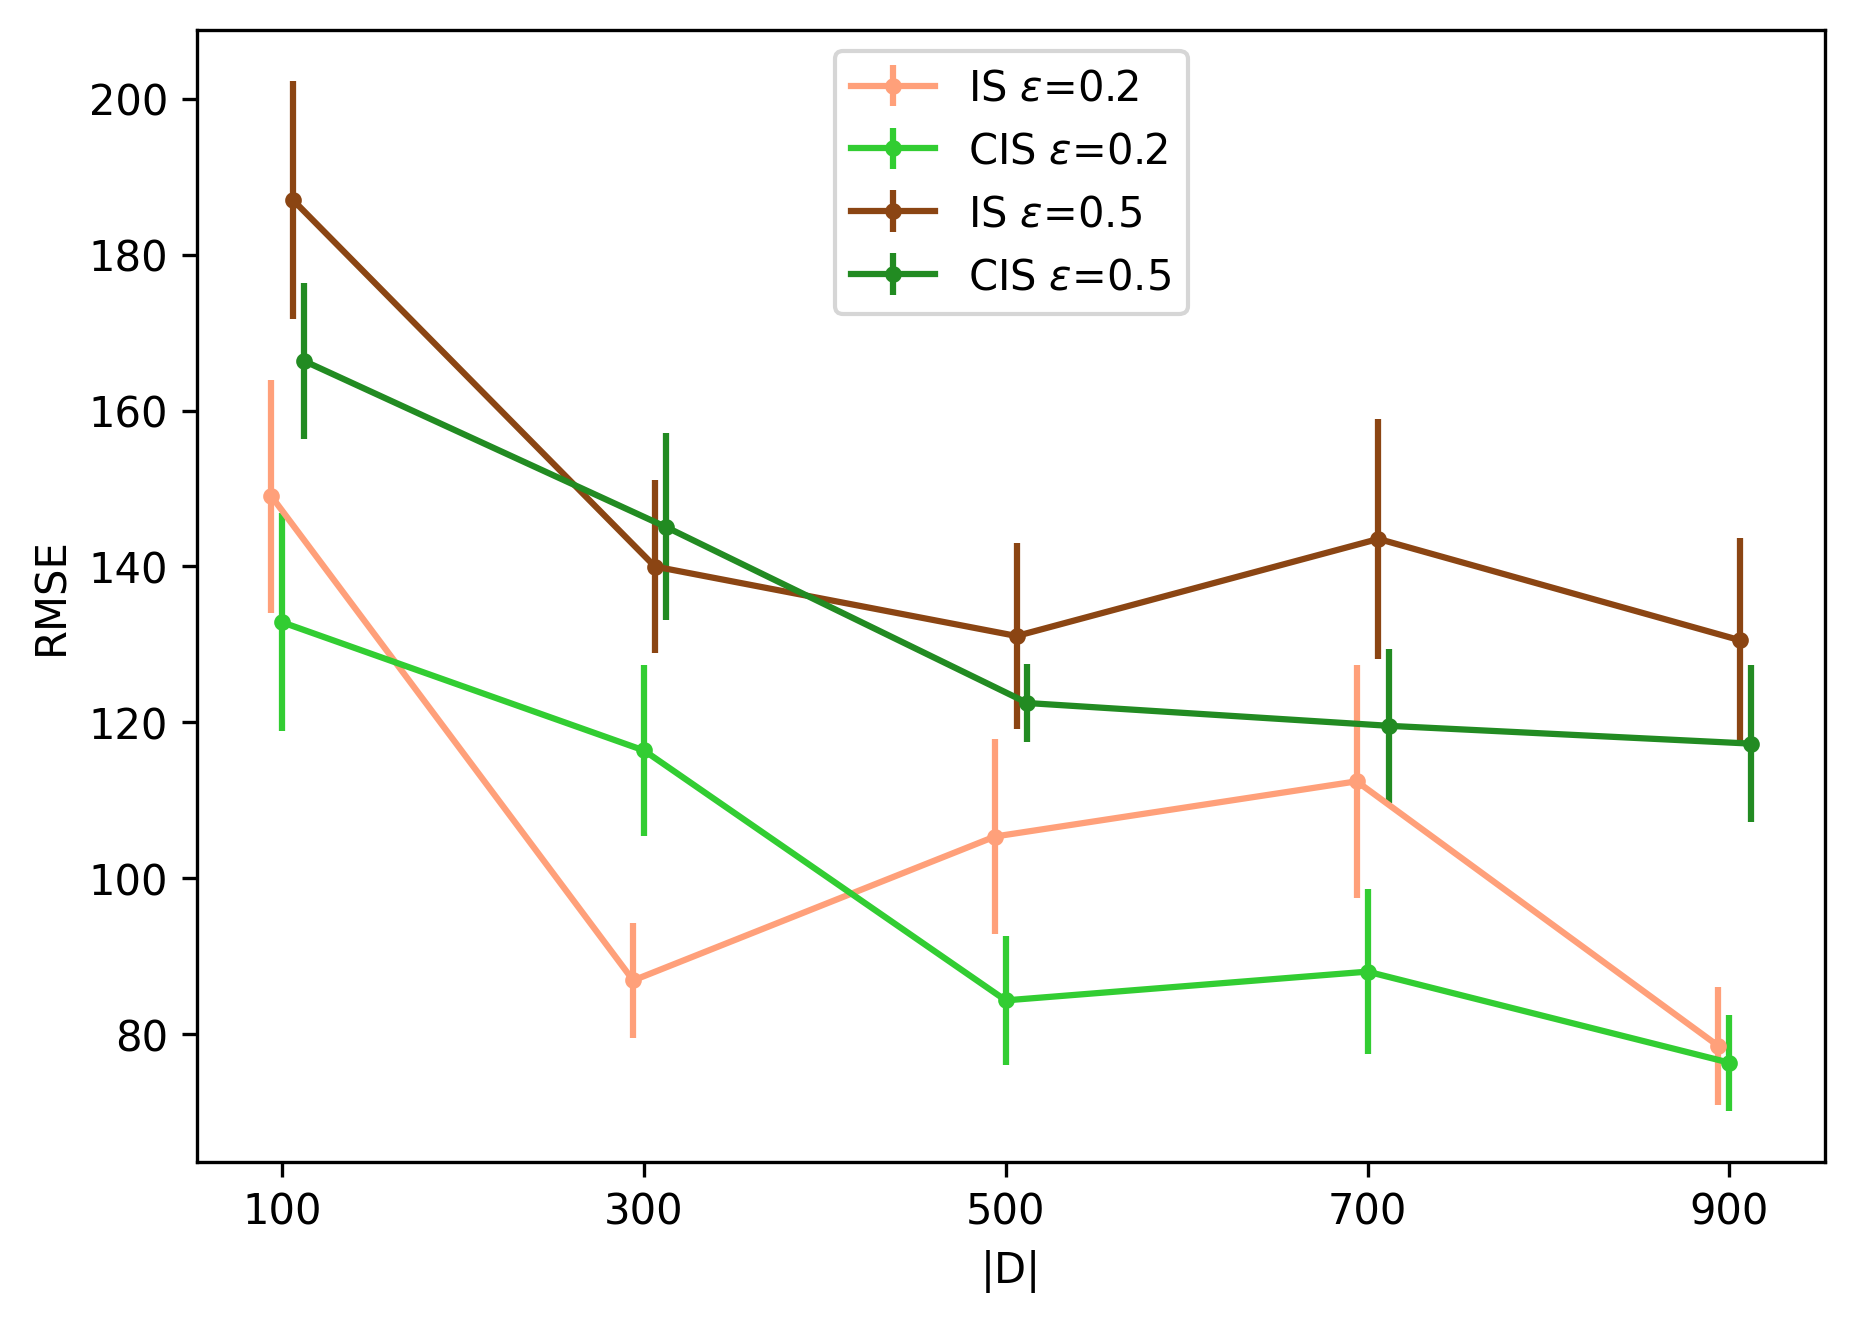

In [132]:
mse_vanilla = np.sqrt(var_vanilla + bias_vanilla**2)
mse_concepts = np.sqrt(var_concepts + bias_concepts**2)
mse_vanilla_no_outliers =np.sqrt(var_vanilla_no_outliers + bias_vanilla_no_outliers**2)
mse_concepts_no_outliers = np.sqrt(var_concepts_no_outliers + bias_concepts_no_outliers**2)

mse_vanilla_05 = np.sqrt(var_vanilla_05 + bias_vanilla_05**2)
mse_concepts_05 = np.sqrt(var_concepts_05 + bias_concepts_05**2)
mse_vanilla_no_outliers_05 = np.sqrt(var_vanilla_no_outliers_05 + bias_vanilla_no_outliers_05**2)
mse_concepts_no_outliers_05 = np.sqrt(var_concepts_no_outliers_05 + bias_concepts_no_outliers_05**2)

mse_comparison = np.sqrt(var_comparison + bias_comparison**2)

fig = plt.figure(figsize=(7,5), dpi=500)

plt.errorbar(x-6, mse_vanilla, yerr=err_vanilla.to_list(), label=pdis_label, color=vanilla_color, marker=".")
plt.errorbar(x, mse_concepts, yerr=err_concepts.to_list(), label=cpdis_label, color=concepts_color, marker=".")
plt.errorbar(x+6, mse_comparison, yerr=err_comparison.to_list(), label=r"CIS opt $\epsilon=0.2$", color=comparison_color, marker=".")
# plt.errorbar(x, mse_vanilla_05, yerr=err_vanilla_05.to_list(), label=pdis_label_2, color=vanilla_color_05, marker=".")
# plt.errorbar(x+12, mse_concepts_05,  yerr=err_concepts_05.to_list(), label=cpdis_label_2, color=concepts_color_05, marker=".")
plt.xlabel("|D|")
plt.ylabel("RMSE")
plt.xticks(x)
plt.legend(loc="upper center", bbox_to_anchor=(0.45,0.8))
for pos in ['right', 'top']:
    plt.gca().spines[pos].set_visible(False)

fig = plt.figure(figsize=(7,5), dpi=300)
plt.errorbar(x-6, mse_vanilla_no_outliers, yerr=err_vanilla_no_outliers.to_list(), label=pdis_label, color=vanilla_color, marker=".")
plt.errorbar(x, mse_concepts_no_outliers, yerr=err_concepts_no_outliers.to_list(), label=cpdis_label, color=concepts_color, marker=".")
plt.errorbar(x+6, mse_vanilla_no_outliers_05, yerr=err_vanilla_no_outliers_05.to_list(), label=pdis_label_2, color=vanilla_color_05, marker=".")
plt.errorbar(x+12, mse_concepts_no_outliers_05,  yerr=err_concepts_no_outliers_05.to_list(), label=cpdis_label_2, color=concepts_color_05, marker=".")
plt.xlabel("|D|")
plt.ylabel("RMSE")
plt.xticks(x)


plt.legend(loc="upper center", ncols=1)
plt.show()